In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/diabetes.csv', index_col=0)
print(df.isna().sum().sum())
df

20


,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


<div dir=rtl >
<h1>حذف داده‌های پوچ</h1>
همانطور که مشاهده می‌شود 20 داده‌ی پوچ در ستون‌های متفاوت داریم، به ترتیب باید سطر این داده‌ها را حذف یا مقدارشان را جایگزین کنیم.


</div>

In [2]:
df.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       1
dtype: int64

<div dir=rtl >
<h3>ستون‌های باینری</h3>
<h6> HeartDiseaseorAttack </h6>
<h6> Fruits </h6>
<h6> Any Health Care </h6>
<h6> No Doctor because of Cost </h6>
<h6> Difficulty Walking </h6>
ابتدا به سراغ ستون‌های باینری دارای داده پوچ می‌رویم.
این ستون‌ها در یک یا دو سطر آن‌ها داده‌ی پوچ وجود دارد که به منظور حذف آن تابع زیر را می‌نویسیم.
در این تابع به ازای index سطرهای دارای داده پوچ بررسی می‌کنیم که تعداد داده‌های پوچ در آن سطر چه تعداد است. اگر این تعدا بیشتر از 5 بود آنگاه کل سطر
را حذف می‌کنیم، در غیر این صورت مقدار mode را به جای داده پوچ قرار می‌دهیم.
</div>

In [3]:
def binary_null_drop(df, column, indexes):
    for i in indexes:
        num_of_nan = df.loc[i].isna().sum()
        if num_of_nan > 5:
            df = df.drop(i)
        else:
            mode = df[column].mode()[0]
            df[column] = df[column].fillna(mode)
    return df

In [4]:
df['HeartDiseaseorAttack'].value_counts(dropna=False)

0.0    60242
1.0    10449
NaN        1
Name: HeartDiseaseorAttack, dtype: int64

In [5]:
index = df['HeartDiseaseorAttack'].index[df['HeartDiseaseorAttack'].apply(np.isnan)]
index

Int64Index([11691], dtype='int64')

In [6]:
df = binary_null_drop(df, 'HeartDiseaseorAttack', indexes=index)


In [7]:
index = df['HeartDiseaseorAttack'].index[df['HeartDiseaseorAttack'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

In [8]:
index = df['Fruits'].index[df['Fruits'].apply(np.isnan)]
index

Int64Index([10000], dtype='int64')

In [9]:
df = binary_null_drop(df, 'Fruits', indexes=index)

In [10]:
index = df['Fruits'].index[df['Fruits'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

In [11]:
index = df['Any Health Care'].index[df['Any Health Care'].apply(np.isnan)]
index

Int64Index([20000], dtype='int64')

In [12]:
df = binary_null_drop(df, 'Any Health Care', indexes=index)

In [13]:
index = df['Any Health Care'].index[df['Any Health Care'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

In [14]:
index = df['No Doctor because of Cost'].index[df['No Doctor because of Cost'].apply(np.isnan)]
index

Int64Index([30000], dtype='int64')

In [15]:
df = binary_null_drop(df, 'No Doctor because of Cost', indexes=index)

In [16]:
index = df['No Doctor because of Cost'].index[df['No Doctor because of Cost'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

In [17]:
index = df['Difficulty Walking'].index[df['Difficulty Walking'].apply(np.isnan)]
index

Int64Index([40000], dtype='int64')

In [18]:
df = binary_null_drop(df, 'Difficulty Walking', indexes=index)

In [19]:
index = df['Difficulty Walking'].index[df['Difficulty Walking'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

<div dir=rtl >
<h5> با توجه به آنکه بعضی از سطرها حذف شده اند مجدد تعداد کل داده‌های پوچ را چاپ می‌کنیم که این مقدار 1 شده است و تنها ستون BMI است که دارای یک داده‌ی 
پوچ می‌باشد.

In [20]:
df.isna().sum()

Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical Activity            0
Fruits                       0
Veggies                      0
Heavy Alcohol Consumption    0
Any Health Care              0
No Doctor because of Cost    0
General Health               0
Mental Health                0
Physical Health              0
Difficulty Walking           0
Sex                          0
Age                          0
Education                    0
Income                       0
dtype: int64

<div dir=rtl >
<h3>ستون BMI</h3>
حال تنها داده‌ی پوچ مربوط به این ستون است.
ابتدا با دستور
<code> value_counts </code>
مقادیر این ستون و تکرار هر یک را نمایش می‌دهیم که شامل مقادیر عددی است که 27 بیشترین تکرار را دارد. 
برای این داده‌ها یکی از راه‌های حذف داده‌ی پوچ، جایگزینی با median است.
بر این اساس مقدار NaN در این ستون را با median جایگزین می‌کنیم
برای این کار ابتدا index سطر حاوی داده‌ی NaN را بدست آورده و سپس 
با استفاده از 
<code> filna </code>
آن را با median جایگزین می‌کنیم.
در صورت اجرای مجدد کد پیدا کردن index می‌بینیم که نتیجه‌ای بازگردانده نمی‌شود، یعنی داده پوچ جایگزین شده است.

</div>

In [21]:
df["BMI"].value_counts(dropna=False)

27.0    6326
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
12.0       1
83.0       1
85.0       1
86.0       1
74.0       1
Name: BMI, Length: 81, dtype: int64

In [22]:
index = df['BMI'].index[df['BMI'].apply(np.isnan)]
index

Int64Index([50000], dtype='int64')

In [23]:
df["BMI"] = df["BMI"].fillna(df["BMI"].median())

In [24]:
index = df['BMI'].index[df['BMI'].apply(np.isnan)]
index

Int64Index([], dtype='int64')

In [25]:
df.isna().sum().sum()

0

<div dir=rtl >
<h5>با آنکه تعدا داده‌های پوچ صفر شده است اما داده‌ی پوچ فقط NaN نیست و ممکن است مثلاً یک ستون دارای داده‌ی Unknown باشد که فقط برای پرکردن جا آمده باشد و فرمت مقادیر آن ستون را برهم زده است. به این منظور دستور 
<code> value_counts </code>
را برای تمامی ستون‌ها چاپ می‌کنیم تا از انواع مقادیر آن‌ها مطمئن شویم. در این راستا ستون Income در یک سطر داده‌ی Unknown دارد که آن سطر را به کل حذف می‌کنیم.

In [26]:
df["Income"].value_counts()

Cat8       20645
Cat7       11425
Cat6       10287
Cat5        8010
Cat4        6658
Cat3        5556
Cat2        4498
Cat1        3611
Unknown        1
Name: Income, dtype: int64

In [27]:
df.drop(df.index[df['Income'] == 'Unknown'], inplace=True)

<div dir=rtl >
<h5> در نهایت پس از پایان حذف داده‌های پوچ با توجه به حذف شدن برخی از سطرها و برهم خوردن ترتیب index ها در دیتافریم، ترتیب index ها را reset می‌کنیم.

In [28]:
df = df.reset_index(drop=True)
len(df)

70690

<div dir=rtl >
<h1>تغییر نام ستون‌ها</h3>
در این راستا یک دیکشنری با key های نام ستون‌های قدیمی و value های نام‌های جدید ستون‌ها تعریف می‌کنیم.
در نام جدید ستون ها فاصله را با خط تیره جایگزین می‌کنیم.

In [29]:
new_names = dict()
for col in df.columns:
    new_names[col] = col.replace(" ", "_")

df = df.rename(columns=new_names)
df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [30]:
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70686,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70687,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70688,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


<div dir=rtl >
<h1>نرمالیزه کردن</h3>
قبل از scale کردن ابتدا در سه ستون رنج‌های بزرگ را به دسته‌های کوچکتر تقسیم می‌کنیم.
به این منظور 
<code> describe </code>
را برای همه‌ی ستون‌ها چاپ می‌کنیم و در ستون‌های
<code> Physical Health </code>، 
<code> Mental Health </code> و 
<code> BMI </code> رنج بزرگی بین حداقل و حداکثر مقدار داده‌ها مشاهده می‌شود.
پس با استفاده از تابع 
<code> normalizer </code>
و apply کردن آن بر تمامی مقادیر یه ستون، هر مقداری را که بین x و x+10 قرار داشته باشد در دسته‌ی مربوط به x قرار می‌دهیم.
طول دسته‌ها 10 تایی و از حداقل مقادیر تا حداکر مقادیر ستون است.


In [31]:
# def normalizer(min, max):
#     def noice(value):
#         for index in range(min, max, 10):
#             if value <= index:
#                 return index // 10
#     return noice

In [32]:
def normalizer(slices):
    def func(x):
        for index, slice in enumerate(slices):
            if x <= slice:
                return index
    return func

In [33]:
df['Physical_Health'].describe()

count    70690.000000
mean         5.810157
std         10.061968
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: Physical_Health, dtype: float64

In [34]:
slices_ph = [_ for _ in range(0, 40, 10)]
df['Physical_Health'] = df['Physical_Health'].apply(normalizer(slices_ph))

In [35]:
df['Mental_Health'].describe()

count    70690.000000
mean         3.751690
std          8.155142
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: Mental_Health, dtype: float64

In [36]:
slices_ph = [_ for _ in range(0, 40, 10)]
df['Physical_Health'] = df['Physical_Health'].apply(normalizer(slices_ph))

In [37]:
df['BMI'].describe()

count    70690.000000
mean        29.856981
std          7.114043
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

In [38]:
slices_ph = [_ for _ in range(10, 110, 10)]
df['BMI'] = df['BMI'].apply(normalizer(slices_ph))

<div dir=rtl >
<h1>اسکِیل کردن</h3>
برای scale کردن از تابع 
<code> MinMaxScaler </code>
از کتابخانه 
<code> sklearn </code>
استفاده می‌کنیم.
به این ترتیب‌های عددی را بین Min و Max آن‌ها scale می‌کنیم که در نهایت مقداری بین 0 و 1 اتخاذ کنند.

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,2,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,1,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,2,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,1,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,2,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,1,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,2,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,1.0,0.0,1.0,1.0,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0,0.0,female,6.0,Cat4,Cat1
70686,1.0,0.0,1.0,1.0,2,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0,1.0,male,10.0,Cat3,Cat6
70687,1.0,1.0,1.0,1.0,2,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0,1.0,female,13.0,Cat6,Cat4
70688,1.0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0,1.0,female,11.0,Cat2,Cat4


In [40]:
df[['BMI', 'Physical_Health', 'Mental_Health', 'Age']] = min_max_scaler.fit_transform(df[['BMI', 'Physical_Health', 'Mental_Health', 'Age']])

In [41]:
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.125,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.0,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,0.125,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.0,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,0.125,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,1.0,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,0.125,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,1.0,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,0.125,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.0,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,1.0,0.0,1.0,1.0,0.250,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.0,0.0,female,0.416667,Cat4,Cat1
70686,1.0,0.0,1.0,1.0,0.125,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.0,1.0,male,0.750000,Cat3,Cat6
70687,1.0,1.0,1.0,1.0,0.125,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,0.500000,0.0,1.0,female,1.000000,Cat6,Cat4
70688,1.0,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.0,1.0,female,0.833333,Cat2,Cat4


<div dir=rtl >
<h1>ویژگی‌های دسته‌بندی شده</h3>
در این بخش ستون‌های با داده‌های دسته‌بندی را به کمک تابع
<code> get_dummies </code>
از کتابخانه‌ی 
<code> pandas </code>
به بردارهای عددی اِنکود می‌کنیم.
با این کار مقادیر یک ستون به یک بردار به طول انواع دسته‌های منحصر به فرد آن ستون تبدیل می‌شوند.
مثلاً در ستون General_Health پنج مقدار Good، High، Low، Medium و GH را داریم.
با تبدیل مقادیر این ستون به فرمت عددی، یک بردار پنج تایی به ازای هر مقدار خواهیم داشت که مقادیر ستون‌های این بردار صفر بوده به غیر از ستون 
مربوط به مقدار دسته‌بندی آن.
به این ترتیب به جای یک ستون یک جدول با تعداد سطرهای برابر با ستون مربوطه و ستون‌های معادل با تعداد دسته‌های منحصر به فرد خواهیم داشت.

In [42]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

In [43]:
GH_encoded = pd.get_dummies(df['General_Health'], prefix='GH')
GH_encoded

,GH_Good,GH_High,GH_Low,GH_Medium,GH_Very Low
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
70685,0,0,1,0,0
70686,1,0,0,0,0
70687,0,0,0,0,1
70688,0,0,1,0,0


In [44]:
Sex_encoded = pd.get_dummies(df['Sex'], prefix='Sex')
Sex_encoded

,Sex_female,Sex_male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
70685,1,0
70686,0,1
70687,1,0
70688,1,0


In [45]:
Education_encoded = pd.get_dummies(df['Education'], prefix='Education')
Education_encoded

,Education_Cat1,Education_Cat2,Education_Cat3,Education_Cat4,Education_Cat5,Education_Cat6
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,1,0
...,...,...,...,...,...,...
70685,0,0,0,1,0,0
70686,0,0,1,0,0,0
70687,0,0,0,0,0,1
70688,0,1,0,0,0,0


In [46]:
Income_encoded = pd.get_dummies(df['Income'], prefix='Income')
Income_encoded

,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
70685,1,0,0,0,0,0,0,0
70686,0,0,0,0,0,1,0,0
70687,0,0,0,1,0,0,0,0
70688,0,0,0,1,0,0,0,0


<div dir=rtl >
<h5> در نهایت این جدول‌های ساخته شده را با یکدیگر و دیتافریم اصلی 
<code> join </code>
می‌کنیم.
مهم است که حتماً ستون‌های قدیمی (دسته‌بندی) را حذف کنیم.

In [47]:
df_pro = df.join(GH_encoded.join(Sex_encoded.join(Education_encoded.join(Income_encoded))))
df_pro = df_pro.drop(['General_Health', 'Sex', 'Income', 'Education'], axis=1)

In [48]:
df_pro

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Education_Cat5,Education_Cat6,Income_Cat1,Income_Cat2,Income_Cat3,Income_Cat4,Income_Cat5,Income_Cat6,Income_Cat7,Income_Cat8
0,0.0,1.0,0.0,1.0,0.125,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0.0,1.0,1.0,1.0,0.125,1.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.0,1.0,0.125,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0.0,1.0,1.0,1.0,0.125,1.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,1.0,0.125,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,1.0,0.0,1.0,1.0,0.250,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
70686,1.0,0.0,1.0,1.0,0.125,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
70687,1.0,1.0,1.0,1.0,0.125,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
70688,1.0,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


<div dir=rtl >
<h1>استخراج برچسب</h3>
در آخرین مرحله از پیش‌پردازش داده‌ها، ستون Diabetes_binary را به عنوان برچسب و باقیمانده جدول را به عنوان داده‌ی آموزش و تست در نظر می‌گیریم.
برای اینکار کافی است ستون برچسب را ابتدا ذخیره کرده و سپس از دیتافریم اصلی حذف کنیم.

In [49]:
Y = df_pro[['Diabetes_binary']]
X = df_pro.drop('Diabetes_binary', axis=1)

<div dir=rtl >
<h1>ساخت مدل طبقه‌بند</h3>
برای ساخت و یادگیری مدل ابتدا باید داده‌های خود را به دو دسته‌ی داده‌های آموزش و داده‌های تست تقسیم کنیم.
به این منظور از تابع
<code> train_test_split </code>
از کتابخانه‌ی
<code> sklearn </code>
استفاده می‌کنیم.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

<div dir=rtl >
 مدل دسته‌بند از کلاس 
 <code> XGBClassifier </code>
 را ساخته و
 برای پارامترهای آن از مقادیر داده شدن در دستور کار استفاده می‌کنیم.
 سپس با تابع
 <code> fit </code>
 و با استفاده از داده‌های train مدل را آموزش می‌دهیم.
 همچنین برای مجموعه داده‌های evaluation در حین آموزش از داده‌های تست استفاده می‌کنیم.

In [51]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,
                        max_depth=4, 
                        n_estimators=200, 
                        subsample=0.5,
                        colsample_bytree=1, 
                        seed=123, 
                        eval_metric='auc', 
                        verbosity=1, 
                        early_stopping_rounds=10)

In [52]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.78386
[1]	validation_0-auc:0.79424
[2]	validation_0-auc:0.80247
[3]	validation_0-auc:0.80433
[4]	validation_0-auc:0.80626
[5]	validation_0-auc:0.80798
[6]	validation_0-auc:0.80887
[7]	validation_0-auc:0.81010
[8]	validation_0-auc:0.81133
[9]	validation_0-auc:0.81217
[10]	validation_0-auc:0.81266
[11]	validation_0-auc:0.81416
[12]	validation_0-auc:0.81454
[13]	validation_0-auc:0.81583
[14]	validation_0-auc:0.81676
[15]	validation_0-auc:0.81719
[16]	validation_0-auc:0.81771
[17]	validation_0-auc:0.81832
[18]	validation_0-auc:0.81873
[19]	validation_0-auc:0.81961
[20]	validation_0-auc:0.82034
[21]	validation_0-auc:0.82068
[22]	validation_0-auc:0.82118
[23]	validation_0-auc:0.82163
[24]	validation_0-auc:0.82188
[25]	validation_0-auc:0.82207
[26]	validation_0-auc:0.82262
[27]	validation_0-auc:0.82306
[28]	validation_0-auc:0.82339
[29]	validation_0-auc:0.82354
[30]	validation_0-auc:0.82375
[31]	validation_0-auc:0.82402
[32]	validation_0-auc:0.82435
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

<div dir=rtl >
پس از پایان یادگیری مقدار دقت، precision و recall خواسته شده در دستور کار را برای داده‌های آموزش و سپس تست بدست می‌آوریم.
به این منظور از توابع
<code> accuracy_score </code>، 
<code> precision_score </code> و 
<code> recall_score </code>
از کتابخانه‌ی
<code> sklearn </code>
استفاده می‌کنیم.

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

predict = model.predict(X_train)

print('-----Train-----')
print('Accuracy = {}'.format(accuracy_score(y_train, predict)))
print('Precision = {}'.format(precision_score(y_train, predict)))
print('Recall = {}'.format(recall_score(y_train, predict)))

-----Train-----
Accuracy = 0.7558353373885981
Precision = 0.73674819957179
Recall = 0.7995704830305591


In [54]:
predict = model.predict(X_test)

print('-----Test-----')
print('Accuracy = {}'.format(accuracy_score(y_test, predict)))
print('Precision = {}'.format(precision_score(y_test, predict)))
print('Recall = {}'.format(recall_score(y_test, predict)))

-----Test-----
Accuracy = 0.750035365681143
Precision = 0.7241152479936851
Recall = 0.7929693127791384


<div dir=rtl >
در نهایت ماتریس درهم‌ریختگی را به ترتیب برای داده‌های آموزش و تست محاسبه می‌کنیم. به این منظور از تابع
<code> plot_confusion_matrix </code>
از کتابخانه‌ی
<code> sklearn </code>
استفاده می‌کنیم.

C:\Users\Amin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


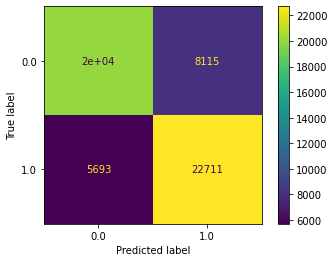

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_train, y_train)

C:\Users\Amin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


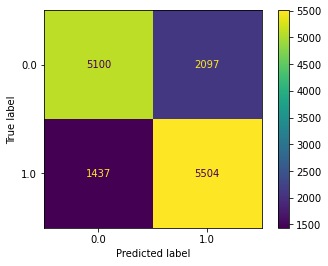

In [56]:
plot_confusion_matrix(model, X_test, y_test)

<div dir=rtl >
<h1>تنظیم هایپرپارامترها</h3>
برای بدست آوردن بهترین مدل حاصل از پارامترهای موجود ابتدا یک تابع امتیازدهی مطابق با دستورکار می‌سازیم.

In [57]:
from sklearn.metrics import roc_auc_score

def my_roc_auc_score(model, X, y): 
    return roc_auc_score(y, model.predict_proba(X)[:,1])

<div dir=rtl >
یک دیکشنری حاوی تمامی پارامترهای داده شده می‌سازیم.

In [58]:
parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.3],
            'max_depth': [2, 3, 4],
            'n_estimators': [100, 200, 300],
            'colsample_bytree': [0.8, 1]}

<div dir=rtl >
جایگشت پارامترها به 72 مدل دسته‌بند متفاوت می‌انجامد.
برای آنکه تمامی مدل‌ها را دستی نسازیم، از
<code> GridSearchCV </code>
با اعتبار سنجی متقابل (cv) برابر با 3
استفاده می‌کنیم.
قبل از آن یک مدل اولیه با پارمترهایی که در 72 مدل قرار است ثابت باشد می‌سازیم و آن را به عنوان ورودی به 
<code> GridSearchCV </code>
می‌دهیم.
سپس مدل‌ها را ساخته و با داده‌های آموزشی، آموزش می‌دهیم تا از نتیجه‌ی آن بتوان بهترین مدل را انتخاب کرد.

In [59]:
from sklearn.model_selection import GridSearchCV

first_model = XGBClassifier(subsample=0.5, eval_metric='auc')
models = GridSearchCV(first_model, parameters, scoring=my_roc_auc_score, cv=3)
models.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x0000020EBA4DF4C0>)

<div dir=rtl >
حال بهترین پارامترها با دستور زیر بدست می‌آید:

In [60]:
best_params = models.best_params_
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 300}

<div dir=rtl >
با دستور زیر نیز مدل ساخته شده بر اساس این پارامترها حاصل می‌شود:

In [61]:
best_model = models.best_estimator_

<div dir=rtl >
مشابه قبل مقدار دقت، precision، recall و ماتریس درهم‌ریختگی را به ازای بهترین مدل حاصل شده و برای داده‌های آموزش و سپس تست بدست می‌آوریم.

<div dir=rtl >
<h4> داده‌های آموزشی:

-----Train-----
Accuracy = 0.7585231291554675
Precision = 0.7384864165588616
Recall = 0.8039008590339389


C:\Users\Amin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


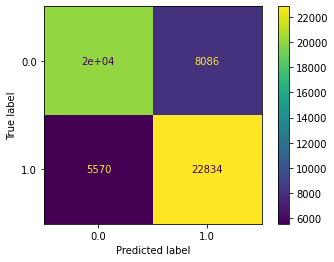

In [62]:
predict = best_model.predict(X_train)

print('-----Train-----')
print('Accuracy = {}'.format(accuracy_score(y_train, predict)))
print('Precision = {}'.format(precision_score(y_train, predict)))
print('Recall = {}'.format(recall_score(y_train, predict)))

plot_confusion_matrix(best_model, X_train, y_train)

<div dir=rtl >
<h4> داده‌های تست:

-----Test-----
Accuracy = 0.750035365681143
Precision = 0.7241152479936851
Recall = 0.7929693127791384


C:\Users\Amin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


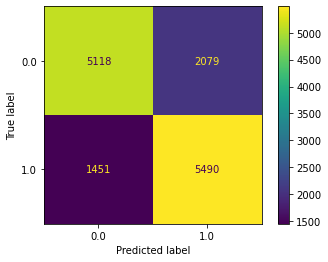

In [63]:
predict = model.predict(X_test)

print('-----Test-----')
print('Accuracy = {}'.format(accuracy_score(y_test, predict)))
print('Precision = {}'.format(precision_score(y_test, predict)))
print('Recall = {}'.format(recall_score(y_test, predict)))

plot_confusion_matrix(best_model, X_test, y_test)

<div dir=rtl >
در نهایت نتیجه‌ی عملکرد تمام 72 مدل بر اساس چهار معیار
mean_fit_time، 
std_fit_time، 
mean_score_time و 
std_score_time
را در یک دیتافریم مجزا نمایش می‌دهیم.

In [64]:
cv_results = pd.DataFrame(models.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.206666,0.071724,0.035001,2.449312e-03,0.8,0.02,2,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.816859,0.809839,0.804067,0.810255,0.005231,72
1,2.531667,0.032294,0.043333,1.248042e-03,0.8,0.02,2,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.824931,0.818364,0.813385,0.818894,0.004729,66
2,4.140332,0.114439,0.049668,8.055879e-03,0.8,0.02,2,300,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.828589,0.822766,0.817413,0.822923,0.004564,57
3,1.583666,0.004922,0.039002,8.168272e-04,0.8,0.02,3,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.822610,0.815762,0.810295,0.816222,0.005038,69
4,3.114000,0.038944,0.044333,4.745758e-04,0.8,0.02,3,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.829212,0.823353,0.818184,0.823583,0.004505,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.293334,0.002867,0.044000,1.325077e-06,1,0.3,3,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.828451,0.824262,0.818651,0.823788,0.004015,50
68,5.039926,0.044915,0.048735,3.756695e-04,1,0.3,3,300,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.826369,0.823288,0.817778,0.822478,0.003554,58
69,2.054649,0.036605,0.041999,7.018853e-07,1,0.3,4,100,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.827611,0.822942,0.819500,0.823351,0.003324,54
70,4.266817,0.232926,0.051616,5.367055e-03,1,0.3,4,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.823078,0.820049,0.815708,0.819612,0.003025,64


<div dir=rtl >
<h1>تصویرسازی تغییر هایپرپارامترها</h3>
برای مشاهده تاثیر تغییر پارامترها بر عملکرد و دقت مدل به صورت زیر عمل می‌کنیم.
به ازای هر مقدار از هر پارامتر یک snapshot از دیتافریم cv_result می‌گیریم.
به طوری که فرض می‌کنیم اگر مقدار یک پارامتر x باشد، سایر پارامترها چه مقادیری دارند و به ازای آن‌ها دو معیار 
<code> meant_fit_time </code> و 
<code> mean_test_score </code>
چه مقداری می‌گیرد.
حال اگر مقدار آن پارامتر از x به y تغییر پیدا کند، به ازای همان مقادیر برای سایر پارامترها، 2 معیار گفته شده چه تغییری می‌کنند.
اگر این کار را برای تمامی پارامترها تکرار کنیم در نهایت یک دیکشنری به نام 
<code> changes </code>
خواهیم داشت که به ازای هر پارامتر، تغییر این دو معیار ارزیابی مدل را به ازای جایگشت سایر پارامترها نشان می‌دهد.

In [99]:
changes = dict()
subjects = ['mean_fit_time', 'mean_test_score']
for parameter, values in parameters.items():
    model_performance = dict()
    for value in values:
        parameters_columns = ['param_' + x for x in parameters if x != parameter]
        columns = parameters_columns + subjects
        res_for_param = cv_results.loc[cv_results['param_' + parameter] == value, columns]
        
        for sub in subjects:
            if sub in model_performance:
                model_performance[sub] = np.hstack((model_performance[sub], res_for_param[[sub]].to_numpy()))
            else:
                model_performance[sub] = res_for_param[[sub]].to_numpy()


    changes[parameter] = model_performance
        

In [100]:
changes

{'learning_rate': {'mean_fit_time': array([[1.20666552, 1.35366615, 1.33100009, 1.3441685 ],
         [2.53166723, 2.5869987 , 2.56066736, 2.57642468],
         [4.14033238, 3.70533307, 3.83133221, 3.82691725],
         [1.58366553, 1.90533805, 1.66533383, 1.57309858],
         [3.11400008, 3.18199905, 3.53620664, 3.16564838],
         [5.98499902, 5.53699923, 4.82421907, 4.60350124],
         [2.40666707, 1.87133066, 1.90648349, 1.87853924],
         [4.0116663 , 3.58033196, 3.81262565, 3.60479148],
         [5.7280004 , 5.49100057, 6.36784561, 5.39053456],
         [1.3880798 , 1.40341377, 1.42190766, 1.37294888],
         [2.7183253 , 2.7126228 , 2.74664021, 2.64553968],
         [4.05443279, 3.9358755 , 4.10936952, 3.93251816],
         [1.73103468, 1.72484366, 1.73030146, 1.68846766],
         [3.42557875, 3.49268603, 3.4197673 , 3.29333353],
         [5.03350544, 5.53741161, 5.22878273, 5.03992621],
         [2.09671028, 2.30428871, 2.12596067, 2.05464927],
         [4.17170938, 

<div dir=rtl >
<h4> در تابع زیر تغییرات را به ازای مقادیر یک پارامتر دریافت می‌کنیم و نمودار آن را به ازای تمام جایگشت‌های پارامترهای دیگر رسم می‌کنیم

In [101]:
import matplotlib.pyplot as plt

def plot_change(changes, parameter_values):
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('tab20b')

    _, ax = plt.subplots(1, 2, figsize=(16,8))

    for sub in subjects:
        for i in range(changes[sub].shape[0]):
            ax[subjects.index(sub)].plot(np.array(parameter_values), changes[sub][i], color=palette(i))
            ax[subjects.index(sub)].set_xticks(parameter_values)
        ax[subjects.index(sub)].title.set_text(sub)


<div dir=rtl >
<h2> Learning Rate </h2>
همانطور که در زیر مشاهده می‌شود نمودار افقی مقادیر این پارامتر و نمودار عمودی مقدار معیار ارزیابی مدل به ازای مقادیر سایر پارامترها است.
با افزایش مقدار پارامتر learning rate میانگین زمان آموزش مدل تغییر چندانی ندارد و شاید بتوان گفت در بیشتر مدل‌ها صعودی است.
همچنین با افزایش مقدار این پارامتر از 0.02 تا 0.1 ، میانگین امتیاز تست، صعودی است اما بعد از آن نزولی می‌شود.

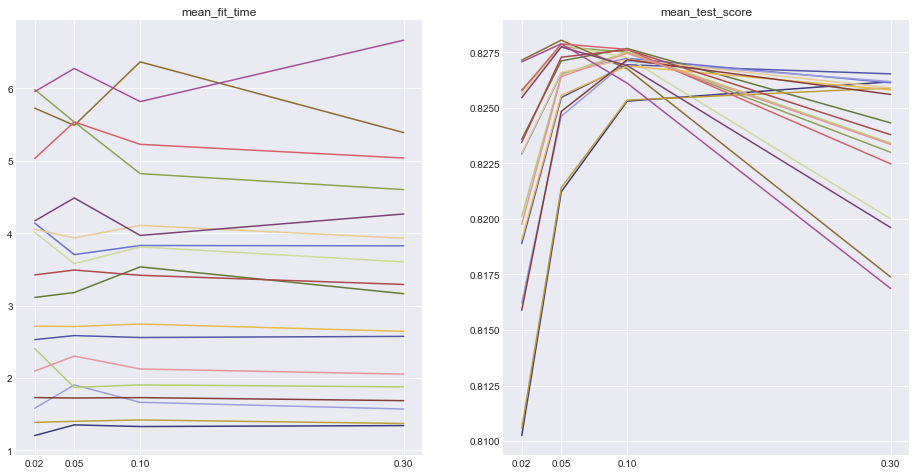

In [102]:
plot_change(changes['learning_rate'], [0.02, 0.05, 0.1, 0.3])

<div dir=rtl >
<h2> Max Depth </h2>
با افزایش مقدار این پارامتر میانگین زمان آموزش به طور کلی افزایش یافته و میانگین امتیاز تست، در بیشتر مدل‌ها افزایشی است.

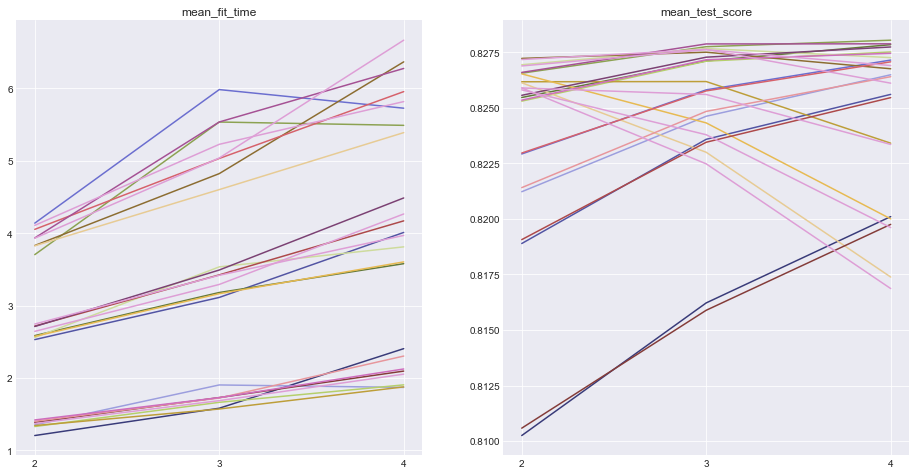

In [103]:
plot_change(changes['max_depth'], [2, 3, 4])

<div dir=rtl >
<h2> N-Estimators </h2>
با افزایش مقدار این پارامتر میانگین زمان آموزش افزایش یافته و میانگین امتیاز تست نیز به طور کلی صعودی است.

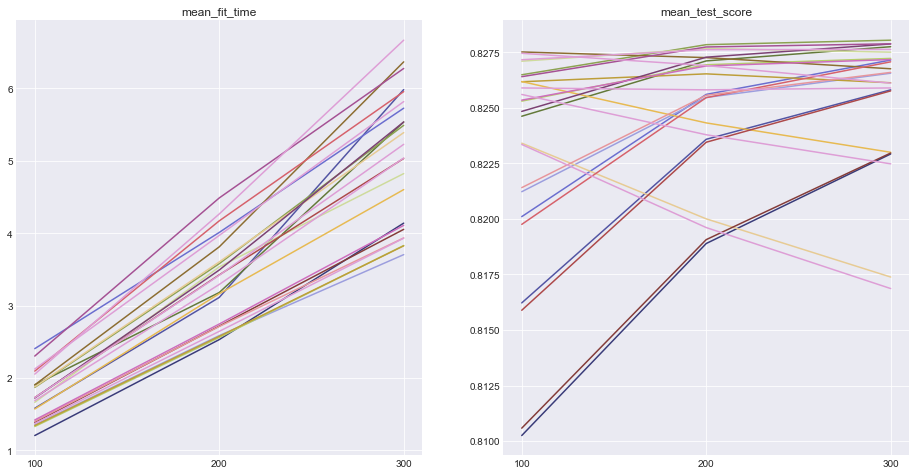

In [104]:
plot_change(changes['n_estimators'], [100, 200, 300])

<div dir=rtl >
<h2> Colsample Bytree</h2>
با افزایش مقدار این پارامتر میانگین زمان آموزش به طور کلی صعوی بوده و میانگین امتیاز تست، تغییر چندانی ندارد.

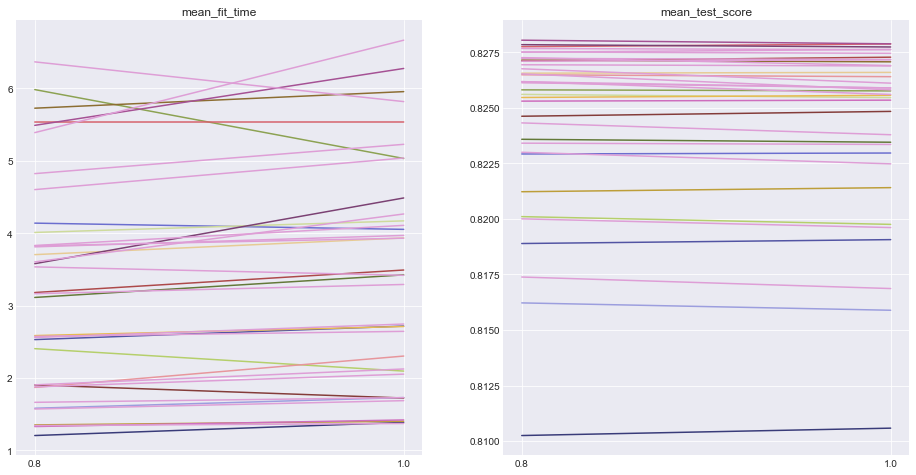

In [105]:
plot_change(changes['colsample_bytree'], [0.8, 1])

<div dir=rtl >
به این ترتیب می‌توانیم مقادیر به دست آمده به عنوان بهترین پارامترها را نیز توجیه کنیم.
</br>
</br>
<font color=gray> محمدامین حبیب اله 
</br>
9739020